In [1]:
#@title # Python Setup { display-mode: "form" }

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

#@markdown <font color="red"><h3><b><i> Begin by running this cell.</i></b></h3> </font>

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>
!pip install exifread &> /dev/null

import os, sys
if 'google.colab' in str(get_ipython()):
  print('Google Colab Environment - Loading Dependencies...')
  !rm -r ImageSTEM imageSTEAM &> /dev/null
  !git clone https://github.com/ImagingLyceum-ASU/ImageSTEAM.git &> /dev/null
  !mv ImageSTEAM/imageSTEAM ./
  !rm -r ImageSTEAM
else:
  print('Local iPython Environment')
  dir1 = os.path.dirname(os.path.abspath('../../'))
  if not dir1 in sys.path: sys.path.append(dir1)

import imageSTEAM as steam
from imageSTEAM import *

import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout

print('Environment Ready!')

Google Colab Environment - Loading Dependencies...
Environment Ready!


# **Introduction**

- What is color?
- How are colored pixels different from grayscale pixels?

#  
<font color="red"> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
</font>



# **RGB values: 0 - 255**

Let's look at color images and see what their pixel values are.

###Start by running the cell below


In [2]:
#@title # Python Setup { display-mode: "form" }
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout
def pixelRGBExample():
  pixel_grid = np.zeros((1,1,3), dtype='uint8')

  sliderR = widgets.IntSlider(description='Red', value=128, min=0, max=255)
  sliderG = widgets.IntSlider(description='Green', value=128, min=0, max=255)
  sliderB = widgets.IntSlider(description='Blue', value=128, min=0, max=255)
  sliders = VBox([sliderR, sliderG, sliderB])

  def _update_display(r, g, b):
    tmp_img = pixel_grid.copy()
    for c in range(pixel_grid.shape[2]):
      # print([r, g, b][c].shape)
      tmp_img[..., c] = pixel_grid[..., c] + [r, g, b][c]

    plt.imshow(tmp_img, cmap='gray', vmin = 0, vmax = 255)
    plt.show()

  output = widgets.interactive_output(_update_display,
                                      {'r': sliderR, 'g': sliderG, 'b': sliderB})
  final_widget = VBox([output, sliders])
  display(final_widget)



In [ ]:
pixelRGBExample()

That was just one pixel, now let's see what happens when different pixels are put together. Let's go ahead and change different pixel values (input the pixel coordinates you want, then input the number you want that pixel changed to).

In [ ]:
#@title # Python Setup { display-mode: "form" }
def pixelColor():
  ## Import example grayscale image
  img_orig = steam.data.amongUs() ##TODO: Update this to RGB image
  h, w = img_orig.shape[:2]
  img_orig = np.zeros([h, w, 3], dtype='uint8')
  for c in range(3):
    img_orig[..., c] = steam.data.amongUs()

  # Make copy which will be our working copy so we can reset
  img_edit = img_orig.copy()

  ## User Controls
  # Sliders
  sliderRow = widgets.IntSlider(description='Row', value=None, min=0, max=h-1)
  sliderCol = widgets.IntSlider(description='Column', value=None, min=0, max=w-1)
  sliderR = widgets.IntSlider(description='Red', value=128, min=0, max=255, orientation='vertical')
  sliderG = widgets.IntSlider(description='Green', value=128, min=0, max=255, orientation='vertical')
  sliderB = widgets.IntSlider(description='Blue', value=128, min=0, max=255, orientation='vertical')
  slidersRGB = HBox([sliderR, sliderG, sliderB])
  sliders = VBox([sliderRow, sliderCol, slidersRGB])
  # Buttons
  buttonConfirm = widgets.Button(description='Confirm')
  buttonReset = widgets.Button(description='Reset')
  buttons = HBox([buttonConfirm, buttonReset])
  # Combined UI
  ui = VBox([sliders, buttons])

  ## Interactive Image Display
  def _update_display(row, col, r, g, b):
    tmp_img = img_edit.copy()
    for c in range(tmp_img.shape[2]):
      tmp_img[row-3:row+4, col-3:col+4, c] = [r, g, b][c]
    utils.display_img(tmp_img, dpi=100)
    # preview.clear_output(wait=True)

  ## Button Functionality
  def _confirm_clicked(b, img_edit=img_edit):
    row, col = sliderRow.value, sliderCol.value
    rgb = [sliderR.value, sliderG.value, sliderB.value]
    for c in range(img_edit.shape[2]):
      img_edit[row, col, c] = rgb[c]

    with preview:
      preview.clear_output(wait=True)
    # display(final_widget)
    return img_edit

  def _reset_clicked(b, img_edit=img_edit):
    with preview:
      # utils.display_img(img_orig, title='Img_Orig', dpi=100)
      img_edit = img_orig#.copy()
      # # utils.display_img(img_edit, title='Img_Edit', dpi=100)
      # # clear_output()
      # with preview:
      preview.clear_output(wait=True)
    # display(final_widget)
    return img_edit

  buttonConfirm.on_click(_confirm_clicked)
  buttonReset.on_click(_reset_clicked)

  preview = widgets.interactive_output(_update_display,
                                       {'row': sliderRow, 'col': sliderCol,
                                        'r': sliderR, 'g': sliderG, 'b': sliderB})

  ## Final Widget
  final_widget = VBox([preview, ui])
  display(final_widget)
  # display.clear_output()

pixelColor()


# **Color Filters**

First, we need to load an image in.


Saving dog.jpg to dog.jpg
User uploaded file "dog.jpg" with length 54509 bytes


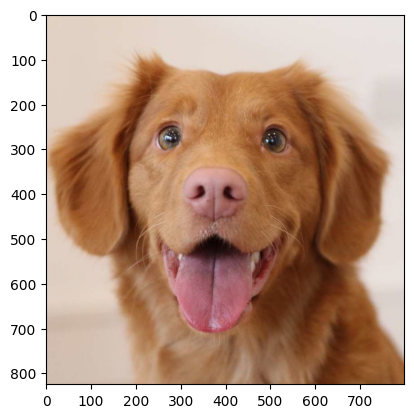

In [3]:
image = upload_image()

Now let's change the pixel colors globally.

In [4]:
#@title # Python Setup { display-mode: "form" }
def globalRGB(img):
  img = img.astype('float32') / 255
  sliderR = widgets.IntSlider(description='Red', value=0, min=0, max=255)
  sliderG = widgets.IntSlider(description='Green', value=0, min=0, max=255)
  sliderB = widgets.IntSlider(description='Blue', value=0, min=0, max=255)
  sliders = VBox([sliderR, sliderG, sliderB])

  def _update_display(r, g, b):
    tmp_img = img.copy()

    for c in range(img.shape[2]):
      # print([r, g, b][c].shape)
      tmp_img[..., c] = img[..., c] + [r, g, b][c]/255.
    # tmp_img /= tmp_img.max()
    plt.imshow(np.clip(tmp_img, 0, 1), cmap='gray', vmin = 0, vmax = 255)
    plt.show()

  output = widgets.interactive_output(_update_display,
                                      {'r': sliderR, 'g': sliderG, 'b': sliderB})
  final_widget = VBox([output, sliders])
  display(final_widget)

globalRGB(image)